In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from matplotlib.ticker import FuncFormatter
import numpy as np

In [129]:
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_FOOD_rebal")
#os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_USER_norebal")
os.chdir("/Users/naroacorettisanchez/Documents/GitHub/MultifunctionalVehicleFleets/results/38reps_MIXED_rebal")


In [137]:
extension = 'csv'

#User trips
user_filenames =[i for i in glob.glob('people_trips_*.{}'.format(extension))]

#Food rips
food_filenames =[i for i in glob.glob('package_trips_*.{}'.format(extension))]


In [138]:
numitems_people = len(user_filenames)
print(numitems_people)

numitems_food = len(food_filenames)
print(numitems_food)

19
19


In [145]:
df_total_user = []

for f in user_filenames:
 temp_f = pd.read_csv(f)
 print(len(temp_f))
 df_total_user.append(temp_f)

14132
14121
14131
14137
14156
14147
14135
14162
14127
14130
14142
14148
14173
14168
14137
14155
14155
14167
14162


In [140]:
df_total_food = []

for f in food_filenames:
 temp_f = pd.read_csv(f)
 print(len(temp_f))
 df_total_food.append(temp_f)

30079
30079
30079
30079
30079
30079
30079
30079
30079
30079
30079
30079
30079
30079
30079
30079
30079
30079
30079


In [141]:
df_total_food

[        Cycle  Day      Time  NumBikes  Battery  AutDrivingSpeed  \
 0        1179    7  01:38:15       217  70000.0              8.0   
 1        1892    7  02:37:40       217  70000.0              8.0   
 2        2033    7  02:49:25       217  70000.0              8.0   
 3        2067    7  02:52:15       217  70000.0              8.0   
 4        2361    7  03:16:45       217  70000.0              8.0   
 ...       ...  ...       ...       ...      ...              ...   
 30074  120410   13  23:14:10       324  70000.0              8.0   
 30075  120466   13  23:18:50       324  70000.0              8.0   
 30076  120537   13  23:24:45       324  70000.0              8.0   
 30077  120543   13  23:25:15       324  70000.0              8.0   
 30078  120581   13  23:28:25       324  70000.0              8.0   
 
        MaxBiddingTime  UrgencyPerson  UrgencyPackage  UrgencyWeight  ...  \
 0                   0              1               0            0.0  ...   
 1              

In [142]:

counts_nbikes_all_food = []

for sim_user in df_total_food:
    sim_user['Day'] = sim_user['Day'] - 6
    sim_user['start_time_ed'] = pd.to_datetime(sim_user['Time']).dt.floor('15Min')
    counts_nbikes = sim_user.groupby(['Day', 'start_time_ed'])['NumBikes'].max().reset_index()
    counts_nbikes_all_food.append(counts_nbikes)

In [146]:

counts_nbikes_all = []

for sim_user in df_total_user:
    sim_user['Day'] = sim_user['Day'] - 6
    sim_user['start_time_ed'] = pd.to_datetime(sim_user['Time']).dt.floor('15Min')
    counts_nbikes = sim_user.groupby(['Day', 'start_time_ed'])['NumBikes'].max().reset_index()
    counts_nbikes_all.append(counts_nbikes)


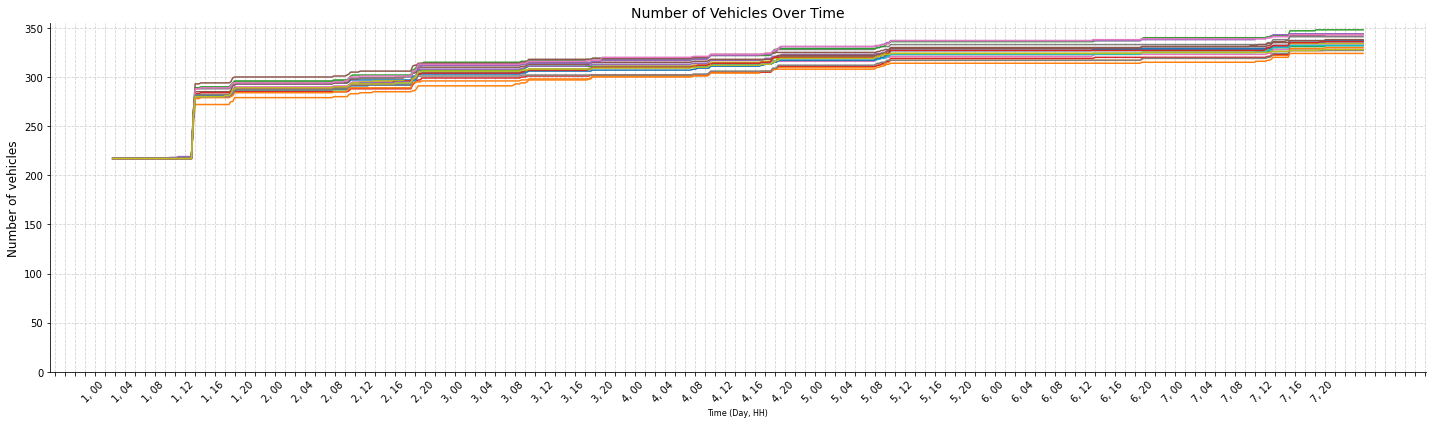

In [147]:
# Continue with your plotting code
fig, ax = plt.subplots(figsize=(20, 6))

# Plot each DataFrame as a separate line
for i, df in enumerate(counts_nbikes_all[:38]):
    total_minutes = (df['Day'] * 24 * 60) + (df['start_time_ed'].dt.hour * 60) + df['start_time_ed'].dt.minute
    ax.plot(total_minutes, df['NumBikes'], label=f'DataFrame {i+1}')

# Customize x-axis tick labels
days = df['Day'].unique()
hours = df['start_time_ed'].dt.hour.unique()
xtick_positions = [(day * 24 * 60) + (hour * 60) for day in days for hour in hours]
xtick_labels = [f'{day}, {hour:02d}' for day in days for hour in hours]

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

plt.xlabel('Time (Day, HH)', fontsize=8)
plt.ylabel('Number of vehicles', fontsize=12)
plt.title('Number of Vehicles Over Time', fontsize=14)

plt.grid(color='lightgray', linestyle='--')
plt.ylim(0)

plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right')

plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=168))

#plt.legend(loc='best')  # Show the legend

plt.tight_layout()
plt.show()

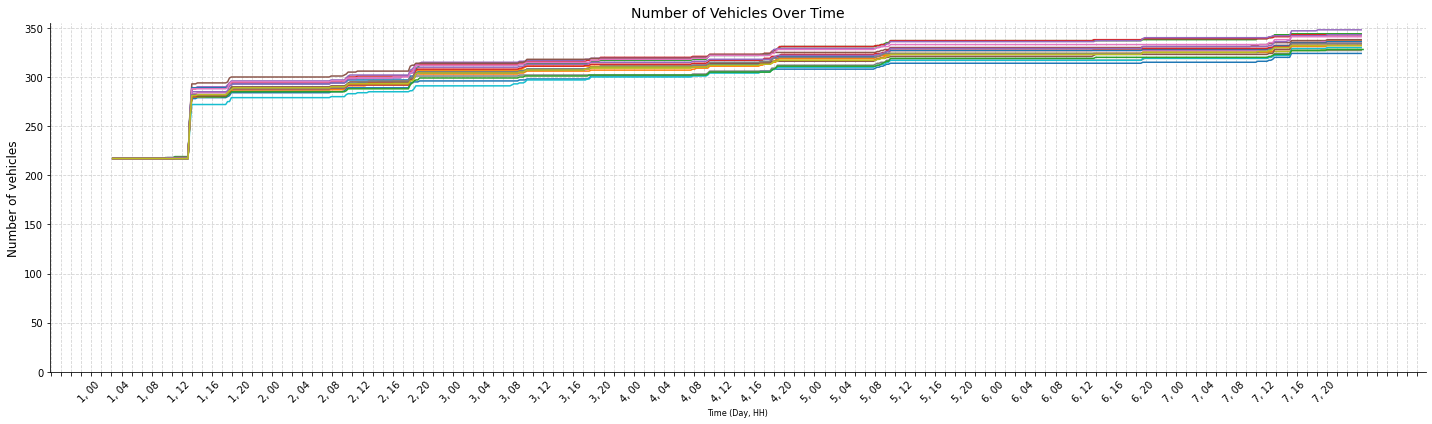

In [148]:
# Continue with your plotting code
fig, ax = plt.subplots(figsize=(20, 6))

# Plot each DataFrame as a separate line
for i, df in enumerate(counts_nbikes_all_food[:38]):
    total_minutes = (df['Day'] * 24 * 60) + (df['start_time_ed'].dt.hour * 60) + df['start_time_ed'].dt.minute
    ax.plot(total_minutes, df['NumBikes'], label=f'DataFrame {i+1}')

# Customize x-axis tick labels
days = df['Day'].unique()
hours = df['start_time_ed'].dt.hour.unique()
xtick_positions = [(day * 24 * 60) + (hour * 60) for day in days for hour in hours]
xtick_labels = [f'{day}, {hour:02d}' for day in days for hour in hours]

ax.set_xticks(xtick_positions)
ax.set_xticklabels(xtick_labels)

plt.xlabel('Time (Day, HH)', fontsize=8)
plt.ylabel('Number of vehicles', fontsize=12)
plt.title('Number of Vehicles Over Time', fontsize=14)

plt.grid(color='lightgray', linestyle='--')
plt.ylim(0)

plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right')

plt.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True, prune='both', nbins=168))

#plt.legend(loc='best')  # Show the legend

plt.tight_layout()
plt.show()

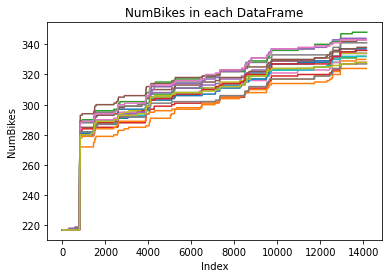

In [149]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_user):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

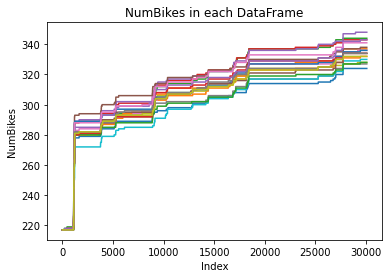

In [150]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Iterate through each DataFrame in df_total
for i, df in enumerate(df_total_food):
    # Assuming the column name is 'NumBikes'
    ax.plot(df['NumBikes'], label=f'DF {i+1}')

# Add labels and title to the plot
ax.set_xlabel('Index')
ax.set_ylabel('NumBikes')
ax.set_title('NumBikes in each DataFrame')

# Add a legend to identify each DataFrame's plot
#ax.legend()

# Show the plot
plt.show()

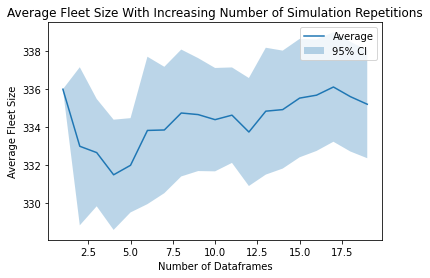

In [159]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_user):
    max_value_day_7 = df.loc[df['Day'] == 7, 'NumBikes'].max()
    max_values_day_7.append(max_value_day_7)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_user) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_user = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [160]:
print(df_table_user)


    Number of Dataframes     Average    CI Lower    CI Upper  CI Delta
0                      1  336.000000  336.000000  336.000000  0.000000
1                      2  333.000000  328.842212  337.157788  8.315576
2                      3  332.666667  329.843944  335.489389  5.645445
3                      4  331.500000  328.601121  334.398879  5.797758
4                      5  332.000000  329.520774  334.479226  4.958451
5                      6  333.833333  329.956675  337.709992  7.753317
6                      7  333.857143  330.534012  337.180274  6.646262
7                      8  334.750000  331.413140  338.086860  6.673721
8                      9  334.666667  331.696574  337.636760  5.940186
9                     10  334.400000  331.681317  337.118683  5.437366
10                    11  334.636364  332.125672  337.147055  5.021383
11                    12  333.750000  330.910395  336.589605  5.679211
12                    13  334.846154  331.509783  338.182525  6.672742
13    

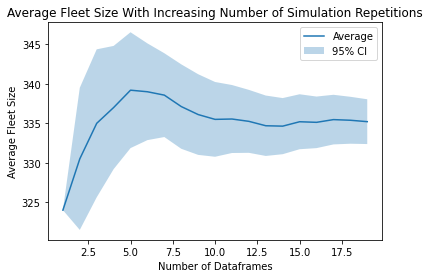

In [161]:
# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i, df in enumerate(df_total_food):
    max_value_day_7 = df.loc[df['Day'] == 7, 'NumBikes'].max()
    max_values_day_7.append(max_value_day_7)
    
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_food) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_food = pd.DataFrame(data)



# Step 6: Save the DataFrame to a CSV file
#df_table.to_csv('average_ci_data.csv', index=False)


In [162]:
print(df_table_food)

    Number of Dataframes     Average    CI Lower    CI Upper   CI Delta
0                      1  324.000000  324.000000  324.000000   0.000000
1                      2  330.500000  321.491460  339.508540  18.017081
2                      3  335.000000  325.622903  344.377097  18.754195
3                      4  337.000000  329.190685  344.809315  15.618630
4                      5  339.200000  331.857975  346.542025  14.684050
5                      6  339.000000  332.871190  345.128810  12.257620
6                      7  338.571429  333.260911  343.881946  10.621036
7                      8  337.125000  331.774820  342.475180  10.700359
8                      9  336.111111  330.999644  341.222578  10.222934
9                     10  335.500000  330.761419  340.238581   9.477162
10                    11  335.545455  331.236816  339.854093   8.617277
11                    12  335.250000  331.261689  339.238311   7.976622
12                    13  334.692308  330.863929  338.520686   7

324 324 324
337 337 337
344 344 344
343 343 343
348 348 348
338 338 338
336 336 336
327 327 327
328 328 328
330 330 330
336 336 336
332 332 332
328 328 328
334 334 334
343 343 343
334 334 334
341 341 341
334 334 334
332 332 332


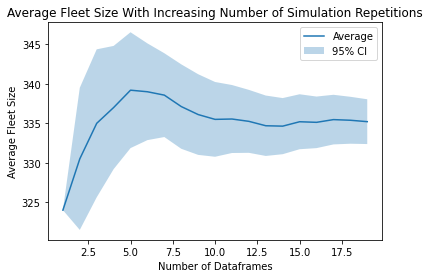

In [166]:
###In the mixed scenario, we need to combine the metrics

# Step 1: Create empty lists to store the maximum values, average values, and confidence intervals
max_values_day_7 = []
avg_values = []
ci_lower_values = []
ci_upper_values = []
ci_delta_values = []

# Step 2: Loop over the dataframes and calculate the maximum value for "day 13"
for i in range(max(numitems_people,numitems_food)):
    #Get that sim number from Users and Food
    df_f=df_total_food[i]
    df_u= df_total_user[i]

    #Find the max value 
    max_value_day_7_f = df_f.loc[df_f['Day'] == 7, 'NumBikes'].max()
    max_value_day_7_u = df_u.loc[df_u['Day'] == 7, 'NumBikes'].max()
    max_value_day_7 = max(max_value_day_7_f, max_value_day_7_u)
    max_values_day_7.append(max_value_day_7)
    
    print(max_value_day_7_f, max_value_day_7_u, max_value_day_7)
    # Calculate the average and confidence intervals with an increasing number of dataframes
    x_values = range(i + 1)
    avg_value = np.mean(max_values_day_7[:i + 1])
    std_value = np.std(max_values_day_7[:i + 1])
    ci_lower = avg_value - 1.96 * std_value / np.sqrt(i + 1)
    ci_upper = avg_value + 1.96 * std_value / np.sqrt(i + 1)
    ci_delta = ci_upper - ci_lower
    
    # Append the average, confidence interval, and delta values to their respective lists
    avg_values.append(avg_value)
    ci_lower_values.append(ci_lower)
    ci_upper_values.append(ci_upper)
    ci_delta_values.append(ci_delta)

# Step 3: Create the x-axis values
x_values = range(1, len(df_total_food) + 1)

# Step 4: Create the plot
plt.plot(x_values, avg_values, label='Average')
plt.fill_between(x_values, ci_lower_values, ci_upper_values, alpha=0.3, label='95% CI')
plt.xlabel('Number of Dataframes')
plt.ylabel('Average Fleet Size')
plt.title('Average Fleet Size With Increasing Number of Simulation Repetitions')
plt.legend()
plt.show()

# Step 5: Create a DataFrame with the data
data = {
    'Number of Dataframes': x_values,
    'Average': avg_values,
    'CI Lower': ci_lower_values,
    'CI Upper': ci_upper_values,
    'CI Delta': ci_delta_values
}
df_table_mixed = pd.DataFrame(data)